<a href="https://colab.research.google.com/github/JeongsupMoon/BioInfo1_term_proj/blob/main/CoLab_TermProj_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생물정보학 및 실습 1 - Term Project용 Mission 2 환경 셋업

```
생물정보학 및 실습 1
서울대학교 협동과정 생물정보학전공 2021년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Factory reset runtime`을 누르고 새로 시작하시면 될 수도 있습니다.


## Google Drive 마운트

데이터 파일들을 불러오고 저장하기 위해서 Google Drive를 연결합니다. **이번엔 스크립트 파일을 편집해야 하기 때문에 Google Drive 마운트를 하지 않으면 vim등 콘솔에서 쓸 수 있는 에디터를 쓰셔야 합니다.** 화면에 나오는 주소를 눌러서 인증하고 인증 코드를 그 아래에 입력하세요. 그러면 `/contents/drive/MyDrive`에서 자신의 Drive 최상단 폴더가 보입니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 실습용 Bioconda 환경 설치하기
실습용 프로그램들을 쉽게 설치할 수 있도록 [Bioconda](https://bioconda.github.io/) 환경을 만듭니다. 실행하고 진행상황을 관찰하다가 에러로 보이는 것이 있으면 잘 읽어보고 해결합니다.

파이썬 모듈들은 Colab쪽의 파이썬 인터프리터를 바꿀 수 없기 때문에 Conda에 설치하더라도 사용하기 어렵습니다. 파이썬 모듈은 `pip` 명령어로 설치하시면 Colab에서 불러와서 사용할 수 있습니다.

환경 초기화에 관련된 스크립트는 [GitHub 프로젝트](https://github.com/hyeshik/colab-biolab)에 있습니다.

In [2]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 69 (delta 22), reused 54 (delta 13), pack-reused 0
Unpacking objects: 100% (69/69), done.
./
./root/
./root/.tmux.conf
./root/.vimrc
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.bin.priority/pip3
./root/.bashrc.biolab
./root/.profile
./root/.condarc
--2021-05-18 03:10:35--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94235922 (90M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  89.87M   154MB/s    in 0.6s    

2021-05-18 03:10:35 (154 MB/s) - ‘miniconda3.sh’ save

설정이 끝났으면, 이제 콘솔을 열어서 터미널로 접속할 수 있는 통로를 열어줍니다.

## Google Drive에 시퀀싱 데이터 다운로드
이제 실습 수업에서 필요한 시퀀싱 데이터를 다운로드 받아서 설치합시다. 드라이브 공간만 충분하면 데이터는 계속 저장돼 있기 때문에 한 번만 하시면 됩니다. Colab에서는 작업용 데이터를 Google Drive 폴더 아래의 `binfo-datapack1`에 저장합니다. 실습용 데이터는 `/content/drive/MyDrive/binfo1-datapack1`에 풀리게 됩니다. 첫 번째에는 wget이 접속오류를 내는 경우가 많으니, 접속에러가 발생하면 다시 한 번 실행해 보세요. 1G씩 끊어지지만 자동으로 이어받아집니다.

In [ ]:
!wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C /content/drive/MyDrive -xf -

받은 데이터의 MD5 체크섬을 확인합니다. 한참 걸립니다. 각 파일들의 원래 체크섬은 다음과 같습니다. 한 번 비교해 보세요.

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

In [3]:
!md5sum drive/MyDrive/binfo1-datapack1/*

140aaf30bcb9276cc716f8699f04ddd6  drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam.bai
d54d428f5872030c4ffc43058709b896  drive/MyDrive/binfo1-datapack1/gencode.gtf
f691d94ca9c72e6feedbfe4561dd5b83  drive/MyDrive/binfo1-datapack1/read-counts.txt
7c9528c08ed2f1ae6e2de599db1aa8fb  drive/MyDrive/binfo1-datapack1/read-counts.txt.summary
328883a73d507eafbf5b60bd6b906201  drive/MyDrive/binfo1-datapack1/RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  drive/MyDrive/binfo1-datapack1/RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  drive/MyDrive/binfo1-datapack1/RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  drive/MyDrive/binfo1-datapack1/RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  drive/MyDrive/binfo1-datapack1/RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  drive/MyDrive/binfo1-datapack1/RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  drive/MyDrive/binfo1-datapack1/RPF-siLin28a.bam
a1bb3e29b

그리고, GENCODE Annotation 데이터도 미리 받아서 저장해 둡니다. 에러가 나면 다시 한 번 실행해 봅니다.

In [ ]:
!wget --no-check-certificate -O /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz

다루기 쉽도록 Annotation 압축을 풉니다.

In [ ]:
!gunzip /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz

In [4]:
!ls -al drive/MyDrive/binfo*

total 7160208
-rw------- 1 root root 1370036258 May  6 08:22 CLIP-35L33G.bam
-rw------- 1 root root    3118336 May  6 08:23 CLIP-35L33G.bam.bai
-rw------- 1 root root  883334756 May  5 14:04 gencode.gtf
-rw------- 1 root root   24065406 May 10 07:01 read-counts.txt
-rw------- 1 root root        751 May 10 07:01 read-counts.txt.summary
-rw------- 1 root root 1003658801 May  6 08:38 RNA-control.bam
-rw------- 1 root root    2276104 May  6 08:39 RNA-control.bam.bai
-rw------- 1 root root 1260991122 May  6 08:47 RNA-siLin28a.bam
-rw------- 1 root root    2710744 May  6 08:47 RNA-siLin28a.bam.bai
-rw------- 1 root root  981684502 May  6 08:59 RNA-siLuc.bam
-rw------- 1 root root    2606104 May  6 08:59 RNA-siLuc.bam.bai
-rw------- 1 root root  737352902 May  6 09:04 RPF-siLin28a.bam
-rw------- 1 root root    2482768 May  6 09:05 RPF-siLin28a.bam.bai
-rw------- 1 root root 1055123479 May  6 09:02 RPF-siLuc.bam
-rw------- 1 root root    2605912 May  6 09:02 RPF-siLuc.bam.bai


실습에 필요한 프로그램들 몇 가지를 추가로 설치합니다.

In [5]:
!conda install -y bedtools bioawk

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda/envs/lab

  added / updated specs:
    - bedtools
    - bioawk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bioawk-1.0                 |       h5bf99c6_6         188 KB  bioconda
    ------------------------------------------------------------
                                           Total:         188 KB

The following NEW packages will be INSTALLED:

  bioawk             bioconda/linux-64::bioawk-1.0-h5bf99c6_6



bioawk-1.0           | 188 KB    | : 100% 1.0/1 [00:00<00:00, 10.34it/s]
Preparing transaction: / done
Ver

## Mission 2

이번 미션에서는 start codon 주변에서 ribosome-protected fragment의 분포를 한 번 살펴보겠습니다. 보통은 RPF의 5'-end 분포가 start codon 앞 15nt 정도에서부터 본격적으로 많이 나오고, 거기서부터 CDS를 걸쳐서 3nt 주기로 올록볼록한 패턴이 나타납니다.

이 그림을 제대로 그리려면 genome coordinate를 start codon을 기준으로 변환해서 작업해야 하지만, 이번 미션에서는 난이도를 적절히 내리기 위해서 start codon이 포함된 exon에 존재하는 5' end만 추려서 작업하도록 합시다. (여유가 좀 있어서 난이도를 적당히 올리고 싶은 분들은 negative strand를 포함할 수도 있고, start codon과 다른 exon에 있는 경우를 포함할 수도 있습니다. 또한 APPRIS 등을 기반으로 해서 transcript 중에 가장 )

In [1]:
%cd /content/drive/MyDrive/binfo1-datapack1/

/content/drive/MyDrive/binfo1-datapack1


우선 annotation에서 start codon이 포함된 exon만 추립니다. Gene 한 개에 isoform이 여러 개 있는 경우 모두 쓰면 read가 너무 부풀려질 수 있기 때문에 우선 transcript support level이 1인 것만 추려서 사용합니다. 여전히 TSL 1만 쓰더라도 부풀려질 가능성은 있기 때문에 제대로 하자면 APPRIS나 RNA-seq 데이터 기준으로 하나만 선정하는 것이 좋습니다만, 일단 여기서는 간단히..

그리고, - strand가 들어가면 좀 계산이 복잡해지니까 또 간단하게 하기 위해서 + strand만 고릅니다. 이번엔 일단 무조건 간단하게 해 봅시다~

In [7]:
!grep '	start_codon	.*	+	.*transcript_support_level "1"' gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-start.gtf
!head gencode-start.gtf

chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000134384.8
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000027036.11
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000150971.8
chr1	HAVANA	start_codon	4928137	4928139	.	+	0	ENSMUST00000081551.14
chr1	HAVANA	start_codon	5154674	5154676	.	+	0	ENSMUST00000044369.13
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000160777.8
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000027038.11
chr1	HAVANA	start_codon	6300227	6300229	.	+	0	ENSMUST00000027040.13
chr1	HAVANA	start_codon	6429555	6429557	.	+	0	ENSMUST00000133144.4
chr1	HAVANA	start_codon	6839122	6839124	.	+	0	ENSMUST00000140079.8


start codon가 들어가 있는 exon들을 고르기 위해서 미리 + strand에 있는 exon를 추립니다.. start codon 쪽에서 TSL 기준으로 골랐기 때문에 여기서는 고르지 않아도 됩니다. 물론 좀 느려지기는 하지만...

In [8]:
!grep '	exon	.*	+	' gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-plusexon.gtf
!head gencode-plusexon.gtf

chr1	HAVANA	exon	3143476	3144545	.	+	.	ENSMUST00000193812.2
chr1	ENSEMBL	exon	3172239	3172348	.	+	.	ENSMUST00000082908.3
chr1	HAVANA	exon	3322980	3323459	.	+	.	ENSMUST00000192857.2
chr1	HAVANA	exon	3536810	3536910	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3583628	3583776	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3602018	3602943	.	+	.	ENSMUST00000192183.2
chr1	HAVANA	exon	3750378	3752011	.	+	.	ENSMUST00000193244.2
chr1	HAVANA	exon	3822233	3824583	.	+	.	ENSMUST00000194454.2
chr1	HAVANA	exon	4566774	4569601	.	+	.	ENSMUST00000193450.2
chr1	HAVANA	exon	4567697	4567877	.	+	.	ENSMUST00000194935.2


그 다음엔 exon 리스트와 start codon 리스트를 겹치고, transcript가 같은 것만 살려둡니다. 기왕 좀 다루기 쉽도록 출력은 bed로 하면서 좌표계를 바꿉니다. 결과는 bedtools에서 빠르게 다룰 수 있게 sort해 둡니다.

In [9]:
!bedtools intersect -a gencode-start.gtf -b gencode-plusexon.gtf -wa -wb | \
 awk -F'	' -v OFS='	' '$9 == $18 { print $10, $13-1, $14, $18, $4-1, $16; }' | \
 sort -k1,1 -k2,3n -k4,4 > gencode-exons-containing-startcodon.bed
!head gencode-exons-containing-startcodon.bed; tail gencode-exons-containing-startcodon.bed

chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4928036	4928199	ENSMUST00000081551.14	4928136	+
chr1	5154639	5154786	ENSMUST00000044369.13	5154673	+
chr1	5659227	5659528	ENSMUST00000027038.11	5659271	+
chr1	5659257	5659528	ENSMUST00000160777.8	5659271	+
chr1	6300182	6300297	ENSMUST00000027040.13	6300226	+
chr1	6429441	6429738	ENSMUST00000133144.4	6429554	+
chr1	6839121	6839176	ENSMUST00000043578.13	6839121	+
chrY	80939672	80939804	ENSMUST00000185340.2	80939686	+
chrY	81470683	81470815	ENSMUST00000187135.2	81470697	+
chrY	82237903	82238035	ENSMUST00000185636.2	82237917	+
chrY	83043623	83043755	ENSMUST00000187165.2	83043637	+
chrY	84109956	84110088	ENSMUST00000185776.7	84109970	+
chrY	84759361	84759493	ENSMUST00000186110.2	84759375	+
chrY	86074448	86074580	ENSMUST00000188754.2	86074462	+
chrY	87129500	87129632	ENSMUST00000189543.7	87129514	+
chrY	87563647	87563779	ENSMUST0000

컬럼 4번에 transcript id, 5번에 start codon 위치를 넣었는데, start codon이 같은 것들이 여러개 눈에 띕니다. 아주 찝찝하지만, 우선 이번은 간단하게 할 것이기 때문에 눈을 질끈 감고 넘어가 봅시다.

이제 alignment를 준비합니다. + strand alignment에서 read length가 짧은 것도 미리 필터링 합니다. RPF는 보통 25nt 이상이기 때문에 그 이하는 거의 확실히 rRNA, tRNA 등에서 오염된 것들입니다. SAM 파일 전체를 필터링해서 다시 인코딩하기 때문에 시간이 좀 걸립니다.

In [10]:
!(samtools view -H RPF-siLuc.bam; \
  samtools view -F20 RPF-siLuc.bam | \
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \
 samtools view -b -o filtered-RPF-siLuc.bam

큰 일을 했으니 용량을 한 번 봅니다.

In [11]:
!ls -al *RPF-siLuc.bam

-rw------- 1 root root  578280809 May 18 03:20 filtered-RPF-siLuc.bam
-rw------- 1 root root 1055123479 May  6 09:02 RPF-siLuc.bam


자 이제 read의 5' end 위치를 셉니다. bedtools의 `genomecov`를 쓰면 아주 편리합니다.

In [12]:
!bedtools genomecov -ibam filtered-RPF-siLuc.bam -bg -5 > fivepcounts-RPF-siLuc.bed
!head fivepcounts-RPF-siLuc.bed

tcmalloc: large alloc 1561239552 bytes == 0x56552e842000 @  0x7f17e09ba887 0x56552d320fea 0x56552d3256fd 0x56552d32633f 0x56552d31e8a9 0x56552d2d2773 0x7f17dffe4bf7 0x56552d2da569
tcmalloc: large alloc 1454047232 bytes == 0x56552e842000 @  0x7f17e09ba887 0x56552d320fea 0x56552d3256fd 0x56552d32633f 0x56552d31e8a9 0x56552d2d2773 0x7f17dffe4bf7 0x56552d2da569
chr1	3176534	3176535	1
chr1	3196256	3196257	1
chr1	3221526	3221527	1
chr1	3221542	3221543	2
chr1	3221545	3221546	3
chr1	3221546	3221547	2
chr1	3221548	3221550	1
chr1	3221571	3221572	1
chr1	3221897	3221898	1
chr1	3221994	3221995	1


그렇게 match 된 것들 중에 앞에서 찾은 start codon을 포함한 exon과 겹치는 것만 골라냅니다.

In [13]:
!bedtools intersect -a fivepcounts-RPF-siLuc.bed -b gencode-exons-containing-startcodon.bed \
 -wa -wb -nonamecheck > fivepcounts-filtered-RPF-siLuc.txt
!head fivepcounts-filtered-RPF-siLuc.txt

chr1	4878048	4878049	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878048	4878049	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878077	4878078	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878101	4878102	4	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878101	4878102	4	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878101	4878102	4	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878103	4878104	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878103	4878104	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+


모든 준비가 끝났습니다. 이제 Figure S5A 도전해 보세요!

* stop codon은 빼고 start codon 만입니다.
* 논문에서는 처리가 어려운 부분까지 모두 포함됐고, read를 중첩해서 세지 않았기 때문에, 여기서 세는 것과는 수치는 다를 수 있습니다.
* `pandas`로 한꺼번에 데이터를 모두 불러들이면 메모리가 부족할 수도 있습니다. 그런 경우에는 chunk를 쓰거나, 줄 단위로 처리해 보세요.

In [21]:
!wc -l fivepcounts-filtered-RPF-siLuc.txt

340499 fivepcounts-filtered-RPF-siLuc.txt


In [2]:
from collections import defaultdict

file1 = open('fivepcounts-filtered-RPF-siLuc.txt', 'r')
Lines = file1.readlines()
count = defaultdict(int)

# Strips the newline character
for line in Lines:
    raw = line.split()
    position=int(raw[1])-int(raw[8])
    count[position] += int(raw[3])

for key in sorted(count.keys()):
  if key < -50 or key > 50:
    del count[key]
  else:
    count[key] = count[key]/1000

print(count)

defaultdict(<class 'int'>, {-35: 3.571, -33: 3.381, -31: 2.787, -30: 2.585, -28: 3.097, -23: 3.928, -13: 42.28, -12: 58.688, -10: 15.827, -7: 19.802, -5: 3.396, -1: 24.865, 2: 14.082, 3: 14.167, 5: 14.832, 9: 14.595, 11: 10.103, 12: 13.096, 14: 13.12, 15: 12.491, 17: 8.459, 18: 11.143, 19: 1.744, 23: 8.625, 25: 1.587, 26: 7.258, 27: 8.804, 30: 7.559, 32: 5.855, 38: 4.685, 40: 1.116, -48: 2.366, -46: 2.656, -45: 2.853, -44: 2.648, -43: 2.876, -41: 3.264, -40: 3.129, -39: 3.121, -37: 3.064, -32: 3.62, -22: 3.417, -21: 3.515, -20: 3.883, -19: 2.655, -16: 2.818, -15: 2.25, -11: 4.94, -9: 26.476, -6: 24.963, -4: 22.648, -3: 18.909, 0: 26.289, 1: 5.234, 4: 3.051, 6: 16.019, 7: 2.719, 8: 12.676, 10: 2.432, 13: 2.126, 16: 2.016, 20: 9.02, 21: 10.251, 22: 1.702, 24: 10.276, 31: 1.309, 34: 1.397, 35: 5.498, 41: 4.299, 42: 5.523, 43: 0.93, 46: 1.077, 47: 4.401, 48: 4.608, 49: 0.777, 50: 3.76, -18: 4.718, -17: 4.124, 29: 5.681, 33: 7.252, 45: 5.0, -34: 3.058, 39: 5.811, 36: 6.829, -29: 3.343, 37: 

Text(0, 0.5, '$\\bf{siLuc}$\nRaw read count\n(x1000)')

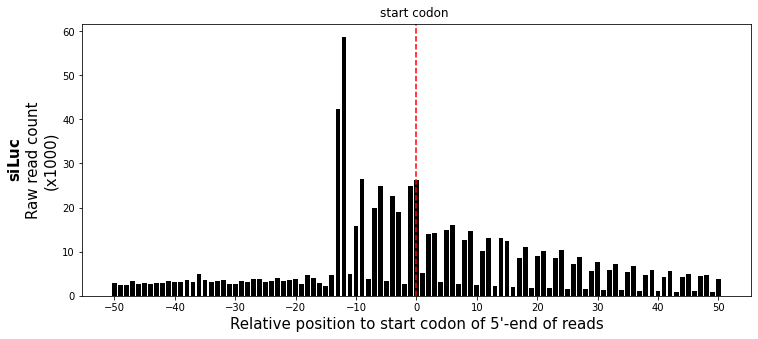

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.bar(count.keys(), count.values(), color='black')
plt.axvline(x = 0, color='r', linestyle='--')
plt.figtext(0.51,0.9,'start codon', fontsize=12, ha='center')
plt.xticks(range(-50, 51, 10))
plt.xlabel("Relative position to start codon of 5'-end of reads", fontsize = 15)

plt.ylabel(r"$\bf{siLuc}$" + "\nRaw read count\n(x1000)", fontsize = 15)